# Analysis on ML test Scores

In [59]:
import pandas as pd #importing the pandas

In [60]:
df = pd.read_csv('scores_data.csv') # reading the data

In [61]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [70]:
df.isnull().sum().sort_values(ascending = False) # There was no null values in the dataframe

Batch      0
User_ID    0
Score      0
dtype: int64

In [63]:
# Score in the Column have extra Spaces before it so we need to remove by replace spaces with nothing
df.columns = df.columns.str.replace(' ' , '')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [65]:
# Cleaning the Score Feature for better understading and changing the type into int
df['Score'] = df['Score'].str.replace('/' , '')
df['Score'] = df['Score'].str.replace(' 7' , '')
df['Score'] = df['Score'].astype('int')

In [66]:
df.Score

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name: Score, Length: 149, dtype: int32

In [67]:
# Score is a Numerical variable

In [68]:
df.Score.unique()

array([6, 7, 4, 5, 3, 2, 0, 1])

In [69]:
df.Batch.unique() # Batch is a Categorical variable

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [74]:
df.Score.describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

<AxesSubplot:>

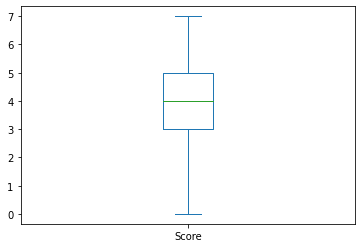

In [77]:
df.Score.plot(kind = 'box')

In [ ]:
# There are no outliers in Score

<AxesSubplot:ylabel='Density'>

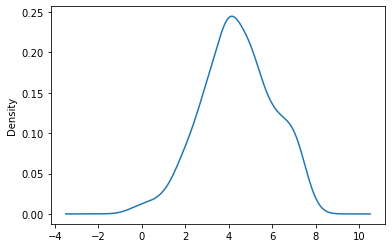

In [78]:
#lets see the distribution of the Score
df.Score.plot(kind = 'kde')

In [79]:
# From the above graph we can say that there are many students who got 4 marks

## Bivariant Analysis

In [75]:
# The User_id wont effect both Batch and Score ofc its just a identification for the Student

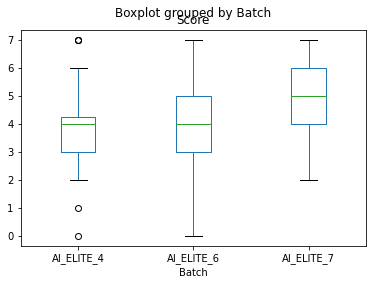

In [82]:
boxplot = df.boxplot(by='Batch', column=['Score'], grid=False)

<AxesSubplot:xlabel='Batch', ylabel='Score'>

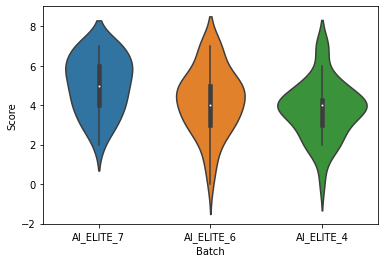

In [84]:
sns.violinplot(x = df['Batch'] , y = df['Score'])

In [91]:
batch_stats = df.groupby('Batch')['Score'].describe()
batch_stats.loc['AI_ELITE_7']

count    53.000000
mean      5.056604
std       1.446682
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: AI_ELITE_7, dtype: float64

In [92]:
batch_stats = df.groupby('Batch')['Score'].describe()
batch_stats.loc['AI_ELITE_6']

count    48.000000
mean      4.229167
std       1.640441
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: AI_ELITE_6, dtype: float64

In [93]:
batch_stats = df.groupby('Batch')['Score'].describe()
batch_stats.loc['AI_ELITE_4']

count    48.000000
mean      3.791667
std       1.443376
min       0.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       7.000000
Name: AI_ELITE_4, dtype: float64

# Batch AI_ELITE_7 has been performing well and AI_ELITE_4 performing less compared to other batches